In [1]:
import json
import requests
import urllib
import pandas as pd
import matplotlib.pyplot as plt


def fix_next_url(next_url):
    "Return fixed next URL to download data from."
    next_url_fixed = ''
    for (key, val) in urllib.parse.parse_qsl(next_url):
        if key != 'file_type':
            next_url_fixed += key + '=' + val + '&'
    return next_url_fixed



In [29]:
# find recid, number of events, size for all AODSIM datasets
myurl = 'http://opendata.cern.ch/api/records/?page=1&size=20&q=&file_type=aodsim'
next_url = myurl

d = []
while next_url:
    r = requests.get(next_url)
    next_url = ''
    if r:
        data = r.json()
        if data:
            for rec in data['hits']['hits']:
                d.append({'recid': rec['metadata']['recid'], 
                          'nevts': rec['metadata']['distribution']['number_events'],
                          'size': rec['metadata']['distribution']['size']/1e6,
                          'evtsize': (rec['metadata']['distribution']['size']/1e6)/(rec['metadata']['distribution']['number_events']),
                          'year': rec['metadata']['date_created'][0],
                          'primary': rec['metadata'].get('categories', {}).get('primary', 'UNKNOWN'),
                          'secondary': rec['metadata'].get('categories', {}).get('secondary', 'UNKNOWN')[0]})
            next_url = data.get('links', {}).get('next', '')
            next_url = fix_next_url(next_url)
        
df = pd.DataFrame(d)
        
        

In [32]:
# find recid, number of events, size for all AODSIM datasets
myurl = 'http://opendata.cern.ch/api/records/?page=1&size=20&q=&file_type=aod'
next_url = myurl

dd = []
while next_url:
    r = requests.get(next_url)
    next_url = ''
    if r:
        data = r.json()
        if data:
            for rec in data['hits']['hits']:
                dd.append({'recid': rec['metadata']['recid'], 
                          'nevts': rec['metadata']['distribution']['number_events'],
                          'size': rec['metadata']['distribution']['size']/1e6,
                          'evtsize': (rec['metadata']['distribution']['size']/1e6)/(rec['metadata']['distribution']['number_events']),
                          'year': rec['metadata']['date_created'][0],
                          'primary': rec['metadata'].get('categories', {}).get('primary', 'UNKNOWN'),
                          'secondary': rec['metadata'].get('categories', {}).get('secondary', 'UNKNOWN')[0]})
            next_url = data.get('links', {}).get('next', '')
            next_url = fix_next_url(next_url)
        
ddf = pd.DataFrame(dd)

In [33]:
ddf.head()

,evtsize,nevts,primary,recid,secondary,size,year
0,0.040297,103848957,UNKNOWN,78,U,4.184825e+06,2010
1,0.044373,67929392,UNKNOWN,82,U,3.014222e+06,2010
2,0.138010,75207487,UNKNOWN,29,U,1.037936e+07,2011
3,0.092923,23605303,UNKNOWN,73,U,2.193479e+06,2010
4,0.154356,33131255,UNKNOWN,25,U,5.114013e+06,2011


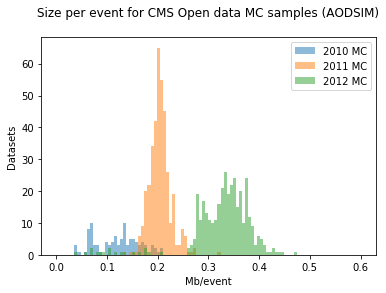

In [46]:

df10 = df[(df.year == '2010')]
df11 = df[(df.year == '2011')]
df12 = df[(df.year == '2012')]

plt.hist(df10.evtsize, bins=100,  alpha=0.5, range=[0,0.6], label='2010 MC')
plt.hist(df11.evtsize, bins=100,  alpha=0.5, range=[0,0.6], label='2011 MC')
plt.hist(df12.evtsize, bins=100,  alpha=0.5, range=[0,0.6], label='2012 MC')
plt.xlabel("Mb/event")
plt.ylabel("Datasets")
plt.title('Size per event for CMS Open data MC samples (AODSIM)\n')
plt.legend()
plt.show()

In [38]:
df12[(df12.evtsize > 3)]


,evtsize,nevts,primary,recid,secondary,size,year
327,3.682002,2969109,Standard Model Physics,12200,Top physics,1.093226e+07,2012
500,3.429388,1498800,Standard Model Physics,12201,QCD,5.139966e+06,2012
501,3.478400,1989000,Standard Model Physics,12202,QCD,6.918538e+06,2012
685,3.592248,2975400,Standard Model Physics,12203,QCD,1.068837e+07,2012


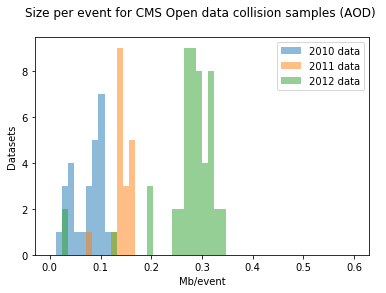

In [44]:
ddf10 = ddf[(ddf.year == '2010')]
ddf11 = ddf[(ddf.year == '2011')]
ddf12 = ddf[(ddf.year == '2012')]

plt.hist(ddf10.evtsize, bins=50,  alpha=0.5, range=[0,0.6], label='2010 data')
plt.hist(ddf11.evtsize, bins=50,  alpha=0.5, range=[0,0.6], label='2011 data')
plt.hist(ddf12.evtsize, bins=50,  alpha=0.5, range=[0,0.6], label='2012 data')
plt.xlabel("Mb/event")
plt.ylabel("Datasets")
plt.title('Size per event for CMS Open data collision samples (AOD) \n')
plt.legend()
plt.show()